# Prework

Let's create some fake data to practice what we've learned so far about pandas. We'll create a dataframe that simulates some NBA games.

To get started, let's import numpy and pandas into this notebook:

In [4]:
import pandas as pd
import numpy as np

Now, we need to create some matchups. We'll use the current list of 30 NBA teams below and create matchups so that every team plays each other once.

In [5]:
teams = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

We'll use a nested for loop to create an array of matchups. Each matchup will be a dictionary containing the team and their opponent. Your output should look like this:

```python
matchups = [{'team': 'Atlanta Hawks', 'opponent': 'Boston Celtics'}, {'team': 'Atlanta Hawks', 'opponent': 'Brooklyn Nets'}, ...]
```

NOTE: Make sure no team plays themselves.

In [6]:
#set up match to be empty list
matchups=[]
for team in teams:
    for opponent in teams:
        if team == opponent:
            continue
        #creat empty dict setup teams
        game={}
        game['team']=team
        game['opponent']=opponent
        matchups.append(game)
#         print('team',team)
#         print('opponent',opponent)

In [7]:
matchups

[{'opponent': 'Boston Celtics', 'team': 'Atlanta Hawks'},
 {'opponent': 'Brooklyn Nets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Charlotte Hornets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Chicago Bulls', 'team': 'Atlanta Hawks'},
 {'opponent': 'Cleveland Cavaliers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Dallas Mavericks', 'team': 'Atlanta Hawks'},
 {'opponent': 'Denver Nuggets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Detroit Pistons', 'team': 'Atlanta Hawks'},
 {'opponent': 'Golden State Warriors', 'team': 'Atlanta Hawks'},
 {'opponent': 'Houston Rockets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Indiana Pacers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Los Angeles Clippers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Los Angeles Lakers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Memphis Grizzlies', 'team': 'Atlanta Hawks'},
 {'opponent': 'Miami Heat', 'team': 'Atlanta Hawks'},
 {'opponent': 'Milwaukee Bucks', 'team': 'Atlanta Hawks'},
 {'opponent': 'Minnesota Timberwolves', 'team

Now let's iterate through our matchups and create a few data points:

1. The team's score
2. The opponent's score
3. Whether or not the game was home or away.

We'll also use numpy to randomly generate these values.

Our matchups will look like this when we're done:

```python
matchups = [
    {
        'opponent': 'Boston Celtics',
        'opponent_score': 93,
        'team': 'Atlanta Hawks',
        'team_score': 104,
        'location': 'H'
    },
    ...
]
```

In [20]:
team_score,opponent_score=np.random.choice(range(95,115),size=2,replace=False)

In [21]:
print(team_score)
print(opponent_score)

105
112


In [2]:
location=np.random.choice(['H','A'])

NameError: name 'np' is not defined

In [3]:
matchups

NameError: name 'matchups' is not defined

In [25]:
for game in matchups:
    team_score,opponent_score=np.random.choice(range(95,115),size=2,replace=False)
    location=np.random.choice(['H','A'])
    game['team_score']=team_score
    game['opponent_score']=opponent_score
    game['location']=location
matchups[0]

{'location': 'A',
 'opponent': 'Boston Celtics',
 'opponent_score': 114,
 'team': 'Atlanta Hawks',
 'team_score': 108}

Now we can use our list of dictionaries to create a pandas dataframe.

In [28]:
df=pd.DataFrame(matchups)
df.head()

,location,opponent,opponent_score,team,team_score
0,A,Boston Celtics,114,Atlanta Hawks,108
1,H,Brooklyn Nets,102,Atlanta Hawks,101
2,A,Charlotte Hornets,103,Atlanta Hawks,108
3,A,Chicago Bulls,110,Atlanta Hawks,101
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100


In [31]:
df.describe()

,opponent_score,team_score
count,870.000000,870.000000
mean,104.558621,104.342529
std,5.717406,5.781396
min,95.000000,95.000000
25%,100.000000,99.000000
50%,105.000000,104.000000
75%,109.000000,109.000000
max,114.000000,114.000000


In [32]:
df.corr()

,opponent_score,team_score
opponent_score,1.000000,-0.115284
team_score,-0.115284,1.000000


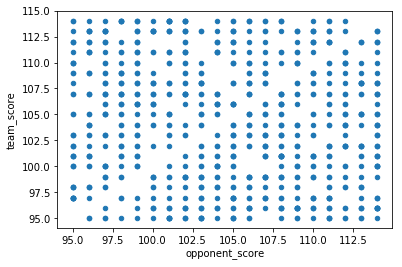

In [34]:
%matplotlib inline
df.plot('opponent_score','team_score',kind='scatter')

In [35]:
df.isnull().sum()

location          0
opponent          0
opponent_score    0
team              0
team_score        0
dtype: int64

# Feature extraction in pandas

In data science, the features you choose to create or omit can be just as important as what machine learning model you choose to use.

Today, we're going to cover feature engineering in pandas.

## Broadcasting

If you recall, broadcasting enables us to perform mathemeatical operations across a vector without having to create a for loop. 

For practice, create a numpy array of numbers 1 - 10:

Now, use broadcasting to double each number in the array:

Because pandas is built on numpy, we can create new features using broadcasting. With our nba dataframe, let's create a win column which will be `True` or `False`, depending on whether or not the team's score is higher than their opponent's.

In [37]:
df['win']=df['team_score']>df['opponent_score']
df.head()

,location,opponent,opponent_score,team,team_score,win
0,A,Boston Celtics,114,Atlanta Hawks,108,False
1,H,Brooklyn Nets,102,Atlanta Hawks,101,False
2,A,Charlotte Hornets,103,Atlanta Hawks,108,True
3,A,Chicago Bulls,110,Atlanta Hawks,101,False
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,False


In machine learning, we need 1's and 0's instead of booleans, so let's change the win column's datatype to be `int`

In [40]:
df['win']=df['win'].astype(int)

df.head()

,location,opponent,opponent_score,team,team_score,win
0,A,Boston Celtics,114,Atlanta Hawks,108,0
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1
3,A,Chicago Bulls,110,Atlanta Hawks,101,0
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0


## Broadcasting practice

Use broadcasting to create a new column called point spread, which is the difference between the team's score and their opponent's.

For example, if the team's score is 90 and their opponent's is 99, then the point spread is -9.

In [49]:
df['spread']=df['team_score']-df['opponent_score']
print(df.head())

  location             opponent  opponent_score           team  team_score  \
0        A       Boston Celtics             114  Atlanta Hawks         108   
1        H        Brooklyn Nets             102  Atlanta Hawks         101   
2        A    Charlotte Hornets             103  Atlanta Hawks         108   
3        A        Chicago Bulls             110  Atlanta Hawks         101   
4        A  Cleveland Cavaliers             109  Atlanta Hawks         100   

   win  spread  
0    0      -6  
1    0      -1  
2    1       5  
3    0      -9  
4    0      -9  


# Mapping

[Basketball Reference](http://www.basketball-reference.com/) is a fantastic site for NBA statistics. We might want to scrape this site down the road, so it's a good idea to know how to navigate to a particular team's page. Each team has a unique slug that is used in their urls. 

For example, Atlanta Hawks' url is http://www.basketball-reference.com/teams/ATL/, which means their slug is ATL. 

Below is a dictionary that **maps** each team to their respective slug (hence the name of this section). We'll use this dictionary to add a couple of columns to our data frame.

In [54]:
slug_dict = {'Atlanta Hawks':'ATL', 'Brooklyn Nets':'BRK', 'Boston Celtics':'BOS', 'Charlotte Hornets':'CHO', 'Chicago Bulls':'CHI', 'Cleveland Cavaliers':'CLE', 'Dallas Mavericks':'DAL', 'Denver Nuggets':'DEN', 'Detroit Pistons':'DET', 'Golden State Warriors':'GSW', 'Houston Rockets':'HOU', 'Indiana Pacers':'IND', 'Los Angeles Clippers':'LAC', 'Los Angeles Lakers':'LAL', 'Memphis Grizzlies':'MEM', 'Miami Heat':'MIA', 'Milwaukee Bucks':'MIL', 'Minnesota Timberwolves':'MIN', 'New Orleans Pelicans':'NOP', 'New York Knicks':'NYK', 'Oklahoma City Thunder':'OKC', 'Orlando Magic':'ORL', 'Philadelphia 76ers':'PHI', 'Phoenix Suns':'PHO', 'Portland Trail Blazers':'POR', 'Sacramento Kings':'SAC', 'San Antonio Spurs':'SAS', 'Toronto Raptors':'TOR', 'Utah Jazz':'UTA', 'Washington Wizards':'WAS'}
slug_dict

{'Atlanta Hawks': 'ATL',
 'Boston Celtics': 'BOS',
 'Brooklyn Nets': 'BRK',
 'Charlotte Hornets': 'CHO',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

We'll use pandas' `map` method along with our dictionary to create a `'team_slug'` column:

In [55]:
df['team_slug']=df['team'].map(slug_dict)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL


## Mapping practice

Using `slug_dict`, create a new column for the opponent's slug:

In [57]:
df['opponent_slug']=df['opponent'].map(slug_dict)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL,BOS
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL,BRK
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL,CHO
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL,CHI
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL,CLE


In [61]:
df['encoded location']=df['location'].map({'A':0,'H':1})
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded location
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL,BOS,0
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL,BRK,1
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL,CHO,0
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL,CHI,0
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL,CLE,0


# Apply

Pandas allows us to use functions to transform our data. Typically this is done in two steps:

1. Create the function you will use to transform your data frame
2. Use the `apply` method to run this function across your data frame.

In our NBA example, let's change our slug columns to be the full url for each team/opponent. 

First, let's create a function that accepts a slug and returns the full Basketball Reference url for that slug:

In [62]:
def create_url_from_slug(slug):
    return 'https://www.basketball-reference.com/teams/{}/'.format(slug)

create_url_from_slug('ATL')

'https://www.basketball-reference.com/teams/ATL/'

Now let's use this function to change our `team_slug` column to be the full url:

In [64]:
df['team_url']=df['team_slug'].apply(create_url_from_slug)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded location,team_url
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL,BRK,1,https://www.basketball-reference.com/teams/ATL/
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL,CHI,0,https://www.basketball-reference.com/teams/ATL/
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/


Now do the same for `opponent_slug`:

In [65]:
df['opponent_url']=df['opponent_slug'].apply(create_url_from_slug)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded location,team_url,opponent_url
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BOS/
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL,BRK,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BRK/
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHO/
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL,CHI,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHI/
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CLE/


### Cleanup: 

Because our columns are now the full url, and not just the slug, it makes sense for use to change the names of our columns:

Not every win in the NBA is the same. An inferior team might be favored simply because they're playing at home. Some [basketball statistics](https://en.wikipedia.org/wiki/Rating_Percentage_Index#Basketball_formula) account for this by reducing the value of a home win (and increasing the value of an away win). 

We'll create a new column called `'adjusted_win'`, which will be 0.6 wins if they won at home and 1.4 wins if they won on the road.

We'll use pandas `apply` method to create this new column.

First, create a function that accepts an individual row as a parameter. 
- If the game was at home, we'll multiply the win column by 0.6
- If the game was played on the raod, multiply the win column by 1.4
- NOTE: If the win column is zero, then our result will be zero

In [73]:
def adjusted_win(row):
    if row['location']=='H':
        return row['win']*0.6
    else:
        return row['win']*1.4
df['adjusted_win']=df.apply(adjusted_win,axis=1)

Now we'll use the `apply` method, along with our function to create the adjusted_win column. 

Note: We'll have to make a slight change to our `apply` method since we're dealing with multiple columns

# Dummies (AKA One Hot Encoding)

We might want to incorporate the game's location in our machine learning model. There's just one problem: we need numerical values, but we have strings.

Thankfully pandas has a method for converting categorical data into numerical data. We'll use `get_dummies` to create numerical columns from our `location` column:

In [69]:
new_df=pd.get_dummies(df,columns=['location'])

## Dummies practice

Create dummy columns from the `team` and `opponent` columns:

In [71]:
pd.get_dummies(df,columns=['team'])


,location,opponent,opponent_score,team_score,win,spread,team_slug,opponent_slug,encoded location,team_url,...,team_Oklahoma City Thunder,team_Orlando Magic,team_Philadelphia 76ers,team_Phoenix Suns,team_Portland Trail Blazers,team_Sacramento Kings,team_San Antonio Spurs,team_Toronto Raptors,team_Utah Jazz,team_Washington Wizards
0,A,Boston Celtics,114,108,0,-6,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
1,H,Brooklyn Nets,102,101,0,-1,ATL,BRK,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
2,A,Charlotte Hornets,103,108,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
3,A,Chicago Bulls,110,101,0,-9,ATL,CHI,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
4,A,Cleveland Cavaliers,109,100,0,-9,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
5,A,Dallas Mavericks,99,100,1,1,ATL,DAL,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
6,H,Denver Nuggets,108,106,0,-2,ATL,DEN,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
7,A,Detroit Pistons,96,107,1,11,ATL,DET,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
8,H,Golden State Warriors,97,113,1,16,ATL,GSW,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
9,A,Houston Rockets,109,96,0,-13,ATL,HOU,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0


In [72]:
pd.get_dummies(df,columns=['opponent'])

,location,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded location,team_url,...,opponent_Oklahoma City Thunder,opponent_Orlando Magic,opponent_Philadelphia 76ers,opponent_Phoenix Suns,opponent_Portland Trail Blazers,opponent_Sacramento Kings,opponent_San Antonio Spurs,opponent_Toronto Raptors,opponent_Utah Jazz,opponent_Washington Wizards
0,A,114,Atlanta Hawks,108,0,-6,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
1,H,102,Atlanta Hawks,101,0,-1,ATL,BRK,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
2,A,103,Atlanta Hawks,108,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
3,A,110,Atlanta Hawks,101,0,-9,ATL,CHI,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
4,A,109,Atlanta Hawks,100,0,-9,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
5,A,99,Atlanta Hawks,100,1,1,ATL,DAL,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
6,H,108,Atlanta Hawks,106,0,-2,ATL,DEN,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
7,A,96,Atlanta Hawks,107,1,11,ATL,DET,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
8,H,97,Atlanta Hawks,113,1,16,ATL,GSW,1,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0
9,A,109,Atlanta Hawks,96,0,-13,ATL,HOU,0,https://www.basketball-reference.com/teams/ATL/,...,0,0,0,0,0,0,0,0,0,0


In [75]:
pd.get_dummies(df[['opponent','team']])

,opponent_Atlanta Hawks,opponent_Boston Celtics,opponent_Brooklyn Nets,opponent_Charlotte Hornets,opponent_Chicago Bulls,opponent_Cleveland Cavaliers,opponent_Dallas Mavericks,opponent_Denver Nuggets,opponent_Detroit Pistons,opponent_Golden State Warriors,...,team_Oklahoma City Thunder,team_Orlando Magic,team_Philadelphia 76ers,team_Phoenix Suns,team_Portland Trail Blazers,team_Sacramento Kings,team_San Antonio Spurs,team_Toronto Raptors,team_Utah Jazz,team_Washington Wizards
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df[df.columns]

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded location,team_url,opponent_url,adjusted_win
0,A,Boston Celtics,114,Atlanta Hawks,108,0,-6,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BOS/,0.0
1,H,Brooklyn Nets,102,Atlanta Hawks,101,0,-1,ATL,BRK,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BRK/,0.0
2,A,Charlotte Hornets,103,Atlanta Hawks,108,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHO/,1.4
3,A,Chicago Bulls,110,Atlanta Hawks,101,0,-9,ATL,CHI,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHI/,0.0
4,A,Cleveland Cavaliers,109,Atlanta Hawks,100,0,-9,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CLE/,0.0
5,A,Dallas Mavericks,99,Atlanta Hawks,100,1,1,ATL,DAL,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/DAL/,1.4
6,H,Denver Nuggets,108,Atlanta Hawks,106,0,-2,ATL,DEN,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/DEN/,0.0
7,A,Detroit Pistons,96,Atlanta Hawks,107,1,11,ATL,DET,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/DET/,1.4
8,H,Golden State Warriors,97,Atlanta Hawks,113,1,16,ATL,GSW,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/GSW/,0.6
9,A,Houston Rockets,109,Atlanta Hawks,96,0,-13,ATL,HOU,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/HOU/,0.0
